In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pyro
import pyro.distributions as dist
import torch

In [3]:
# torch.distributions.Bernoulli(0.3).sample()
def flip(p=0.5):
    return torch.distributions.Bernoulli(p).sample()

def pflip(p=0.5, var='flip'):
    return pyro.sample(var, dist.Bernoulli(p))

def repeat(f, n):
    return [f() for _ in range(n)]

def viz(data, to_type=(lambda v: v), plot_args={}):
    # Histogram
    if type(data) is list:
        data = [to_type(d) for d in data]
        return plt.hist(data, weights=np.ones(len(data))/float(len(data)), **plot_args)
    
    if isinstance(data, pyro.distributions.Distribution):
        d = {to_type(s): float(data.log_prob(s).exp()) for s in data.enumerate_support()}
        return plt.bar(*zip(*d.items()))
        
        
    
    

In [40]:
flip() + flip() + flip()

tensor(3.)

(array([0.123, 0.   , 0.   , 0.374, 0.   , 0.   , 0.372, 0.   , 0.   ,
        0.131]), array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ],
       dtype=float32), <a list of 10 Patch objects>)

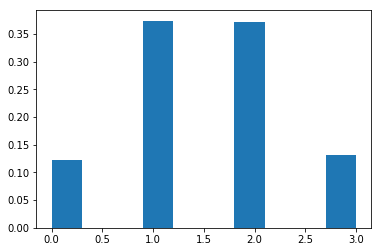

In [137]:
sumFlips = lambda: flip() + flip() + flip()
viz(repeat(sumFlips, 1000))

In [94]:
noisy_double = lambda x: (x+x if flip() else x)
noisy_double(3)

6

(array([0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

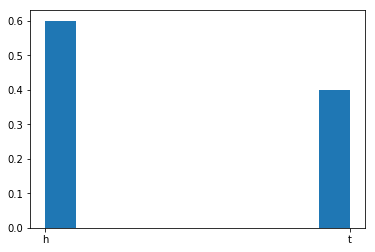

In [101]:
fair_coin = lambda: ('h' if flip(0.5) else 't')
viz(repeat(fair_coin, 20))

(array([0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

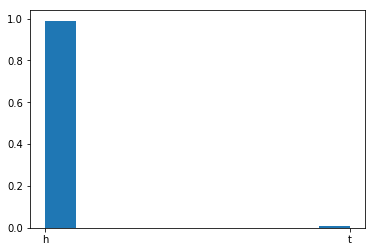

In [107]:
fair_coin = lambda: ('h' if flip(0.95) else 't')
viz(repeat(fair_coin, 100))

(array([0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

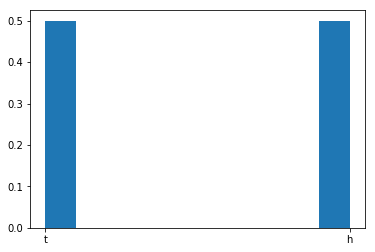

In [108]:
def make_coin(weight): 
    return lambda: ('h' if flip(weight) else 't')

fair_coin = make_coin(0.5);
viz(repeat(fair_coin, 20))

(array([0.95, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

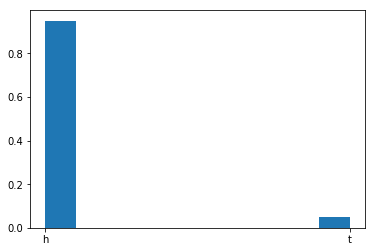

In [109]:
trick_coin = make_coin(0.95);
viz(repeat(trick_coin, 20))

(array([0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

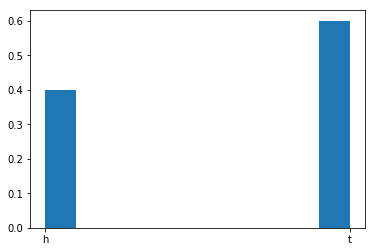

In [112]:
bent_coin = make_coin(0.25);

viz(repeat(bent_coin, 20))

(array([0.65, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.35]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

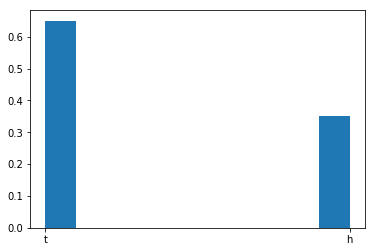

In [119]:
def make_coin(weight): 
    return lambda: ('h' if flip(weight) else 't')

def bend(coin):
    return lambda: (make_coin(0.7)() if (coin() == 'h') else make_coin(0.1)())

fair_coin = make_coin(0.5)
bent_coin = bend(fair_coin)
viz(repeat(bent_coin, 100))

(array([0.01, 0.02, 0.  , 0.05, 0.  , 0.28, 0.  , 0.23, 0.  , 0.31, 0.1 ]),
 array([ 4.       ,  4.5454545,  5.090909 ,  5.6363635,  6.181818 ,
         6.7272725,  7.2727275,  7.818182 ,  8.363636 ,  8.909091 ,
         9.454545 , 10.       ], dtype=float32),
 <a list of 11 Patch objects>)

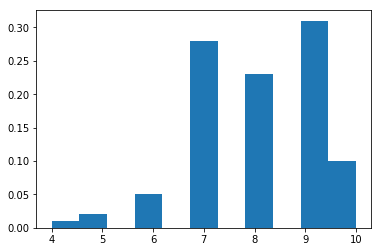

In [156]:
def make_coin(weight): 
    return lambda: flip(weight)
coin = make_coin(0.8)

viz(repeat(lambda: sum(repeat(coin, 10)), 100), plot_args={'bins': 11})

In [168]:
lung_cancer = flip(0.01)
cold = flip(0.2)
cough = (cold or lung_cancer)
print(bool(cough))

True


In [184]:
lung_cancer = flip(0.01)
TB = flip(0.005)
stomach_flu = flip(0.1)
cold = flip(0.2)
other = flip(0.1)

cough = (
    (cold and flip(0.5)) or
    (lung_cancer and flip(0.3)) or
    (TB and flip(0.7)) or
    (other and flip(0.01)))

fever = (
    (cold and flip(0.3)) or
    (stomach_flu and flip(0.5)) or
    (TB and flip(0.1)) or
    (other and flip(0.01)))

chest_pain = (
    (lung_cancer and flip(0.5)) or
    (TB and flip(0.5)) or
    (other and flip(0.01)))

shortness_of_breath = (
    (lung_cancer and flip(0.5)) or
    (TB and flip(0.2)) or
    (other and flip(0.01)))

symptoms = {
  'cough': bool(cough),
  'fever': bool(fever),
  'chest_pain': bool(chest_pain),
  'shortness_of_breath': bool(shortness_of_breath),
}

symptoms

{'cough': False,
 'fever': False,
 'chest_pain': False,
 'shortness_of_breath': False}

(array([0.2 , 0.  , 0.  , 0.28, 0.  , 0.  , 0.24, 0.  , 0.  , 0.28]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

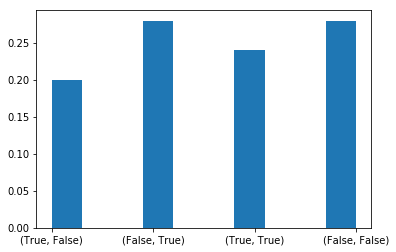

In [8]:
random_pair = lambda: (bool(flip()), bool(flip()))
viz(repeat(random_pair, 100), to_type=str)

# Distributions in pyro

In [16]:
d = dist.Bernoulli(0.5)

In [25]:
d.log_prob(False)

tensor(-0.6931)

In [30]:
type(d)

pyro.distributions.torch.Bernoulli

In [33]:
plt.np.exp((-0.6931)*2)

0.2500235913930103

{tensor(0.): 0.5, tensor(1.): 0.5}

sample  tensor(0.)
log prob  tensor(-0.6931)


<BarContainer object of 2 artists>

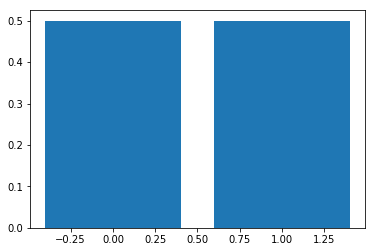

In [54]:
# make a distribution using the Bernoulli constructor:
d = dist.Bernoulli(0.5)

# sample from it with the sample operator:
print('sample ', d.sample())

# compute the log-probability of sampling true:
print('log prob ', d.log_prob(False))

# visualize the distribution:
viz(d)

In [61]:
# create a gaussian distribution:
d = dist.Normal(0, 1)

# sample from it:
print('sample ', d.sample())

# and build more complex processes!
foo = lambda: dist.Normal(0, 1).sample() * dist.Normal(0, 1).sample()
print('foo ', foo())

sample  tensor(-0.0935)
foo  tensor(-0.4446)


# Marginal distributions: `Infer`

In [62]:
# a complex function, that specifies a complex sampling process:
def foo():
    a = pyro.sample('a', dist.Normal(0, 1))
    b = pyro.sample('b', dist.Normal(0, 1))
    return a * b

# # make the marginal distributions on return values explicit:
# var d = Infer({method: 'forward', samples: 1000}, foo)

# # now we can use d as we would any other distribution:
# print( sample(d) )
# viz(d)

(array([  3.,   0.,   3.,   1.,   4.,   0.,   6.,  16.,  11.,  37.,  73.,
        151., 348., 157.,  70.,  38.,  31.,  27.,  14.,   1.,   1.,   3.,
          3.,   0.,   2.]),
 array([-5.3401237 , -4.9145975 , -4.489071  , -4.0635448 , -3.6380184 ,
        -3.212492  , -2.7869656 , -2.3614392 , -1.935913  , -1.5103867 ,
        -1.0848603 , -0.659334  , -0.23380765,  0.19171867,  0.617245  ,
         1.0427713 ,  1.4682977 ,  1.893824  ,  2.3193502 ,  2.7448766 ,
         3.170403  ,  3.5959294 ,  4.021456  ,  4.446982  ,  4.8725085 ,
         5.2980347 ], dtype=float32),
 <a list of 25 Patch objects>)

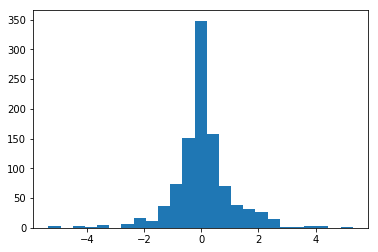

In [69]:
# make the marginal distributions on return values explicit:
posterior = pyro.infer.Importance(foo, num_samples=1000)
marginal = pyro.infer.EmpiricalMarginal(posterior.run())
plt.hist(marginal.sample(torch.Size([1000])), bins=25)

# Stochastic recursion

```javascript
var geometric = function (p) {
    flip(p) ? 0 : 1 + geometric(p);
};
var g = Infer({method: 'forward', samples: 1000},
              function(){return geometric(0.6)})
viz(g)

```

<BarContainer object of 7 artists>

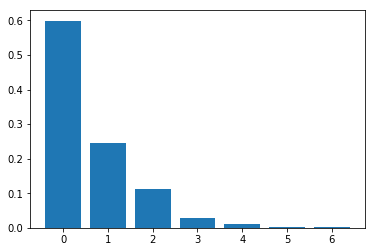

In [75]:
def geometric(p, t=0):
    x = pyro.sample(f"x_{t}", pyro.distributions.Bernoulli(p))
    return torch.tensor(0) if x else 1 + geometric(p, t + 1)

# make the marginal distributions on return values explicit:
g = pyro.infer.Importance(geometric, num_samples=1000)
marginal = pyro.infer.EmpiricalMarginal(g.run(0.6))
samples = marginal.sample(torch.Size([1000]))

labels, counts = np.unique(samples, return_counts=True, axis=0)
probs = counts / np.sum(counts)
plt.bar(range(len(labels)), probs, align='center', tick_label=[str(w) for w in labels])

# Persistent Randomness

```javascript
var eyeColor = mem(function (person) {
    return uniformDraw(['blue', 'green', 'brown']);
});
[eyeColor('bob'), eyeColor('alice'), eyeColor('bob')];
```

In [126]:
import functools
    
def memoize(fn=None, **kwargs):
    if fn is None:
        return lambda _fn: memoize(_fn, **kwargs)
    return functools.lru_cache(**kwargs)(fn)

In [134]:
def cat(n=10):
    return dist.Categorical(torch.ones(n)).sample()

[cat() for _ in range(10)]

[tensor(8),
 tensor(5),
 tensor(1),
 tensor(3),
 tensor(5),
 tensor(6),
 tensor(3),
 tensor(5),
 tensor(2),
 tensor(9)]

In [137]:
@memoize
def memcat(n=10):
    return dist.Categorical(torch.ones(n)).sample()

[memcat() for _ in range(10)]

[tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5)]

# Intuitive Physics Example

```javascript
var listMin = function(xs) {
  if (xs.length == 1) {
    return xs[0]
  } else {
    return Math.min(xs[0], listMin(rest(xs)))
  }
}

var ground = {shape: 'rect', static: true, dims: [worldWidth, 10],
              x: worldWidth/2, y: worldHeight+6};

var stableWorld = [
  ground,
  {shape: 'rect', static: false, dims: [60, 22], x: 175, y: 473},
  {shape: 'rect', static: false, dims: [50, 38], x: 159.97995044874122, y: 413},
  {shape: 'rect', static: false, dims: [40, 35], x: 166.91912737427202, y: 340},
  {shape: 'rect', static: false, dims: [30, 29], x: 177.26195677111082, y: 276},
  {shape: 'rect', static: false, dims: [11, 17], x: 168.51354470809122, y: 230}
]

var almostUnstableWorld = [
  ground,
  {shape: 'rect', static: false, dims: [24, 22], x: 175, y: 473},
  {shape: 'rect', static: false, dims: [15, 38], x: 159.97995044874122, y: 413},
  {shape: 'rect', static: false, dims: [11, 35], x: 166.91912737427202, y: 340},
  {shape: 'rect', static: false, dims: [11, 29], x: 177.26195677111082, y: 276},
  {shape: 'rect', static: false, dims: [11, 17], x: 168.51354470809122, y: 230}
]

var unstableWorld = [
  ground,
  {shape: 'rect', static: false, dims: [60, 22], x: 175, y: 473},
  {shape: 'rect', static: false, dims: [50, 38], x: 90, y: 413},
  {shape: 'rect', static: false, dims: [40, 35], x: 140, y: 340},
  {shape: 'rect', static: false, dims: [10, 29], x: 177.26195677111082, y: 276},
  {shape: 'rect', static: false, dims: [50, 17], x: 140, y: 230}
]

var doesTowerFall = function (initialW, finalW) {
  var highestY = function (w) { listMin(map(function(obj) { return obj.y }, w)) }
  var approxEqual = function (a, b) { Math.abs(a - b) < 1.0 }
  !approxEqual(highestY(initialW), highestY(finalW))
}

var noisify = function (world) {
  var perturbX = function (obj) {
    var noiseWidth = 10
    obj.static ? obj : _.extend({}, obj, {x: uniform(obj.x - noiseWidth, obj.x + noiseWidth) })
  }
  map(perturbX, world)
}

var run = function(world) {
  var initialWorld = noisify(world)
  var finalWorld = physics.run(1000, initialWorld)
  doesTowerFall(initialWorld, finalWorld)
}

viz(
  Infer({method: 'forward', samples: 100},
        function() { run(stableWorld) }))
viz(
  Infer({method: 'forward', samples: 100},
        function() { run(almostUnstableWorld) }))
viz(
  Infer({method: 'forward', samples: 100},
        function() { run(unstableWorld) }))

// uncomment any of these that you'd like to see for yourself
// physics.animate(1000, stableWorld)
// physics.animate(1000, almostUnstableWorld)
// physics.animate(1000, unstableWorld)
```